In [16]:
# TASK 5 - HANDWRITTEN TEXT GENERATION - DATA PREPROCESSING
# CodSoft Machine Learning Internship
# Author: Chandan Kumar | Batch: December 2025 B68

"""
📘 Project: Handwritten Text Generation - Preprocessing
🎯 Objective: Load and preprocess handwriting dataset
📊 Dataset: corto-ai/handwritten-text from Hugging Face
"""

# PART 1: IMPORTS AND SETUP

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset
from datasets import load_dataset

# Text Processing
from collections import Counter
import string
import re

# Utilities
import pickle
import os
from datetime import datetime

In [17]:
# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")
print(f"📅 Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Create directories
os.makedirs('../artifacts', exist_ok=True)
os.makedirs('../models', exist_ok=True)
os.makedirs('../images', exist_ok=True)

print("✅ Directories created/verified")

✅ Libraries imported successfully!
📅 Date: 2025-12-20 16:45:03
✅ Directories created/verified


In [18]:
# PART 2: LOAD DATASET FROM HUGGING FACE

print("\n" + "="*80)
print("📂 LOADING HANDWRITTEN TEXT DATASET")
print("="*80)

# Load dataset
print("🔄 Downloading dataset from Hugging Face: corto-ai/handwritten-text")
ds = load_dataset("corto-ai/handwritten-text")

print(f"\n✅ Dataset loaded successfully!")
print(f"📊 Dataset structure: {ds}")

# Check available splits
available_splits = list(ds.keys())
print(f"📚 Available splits: {available_splits}")

# Use train split or first available split
split_name = 'train' if 'train' in available_splits else available_splits[0]
dataset = ds[split_name]

print(f"\n📋 Using split: '{split_name}'")
print(f"📊 Number of samples: {len(dataset)}")

# Inspect sample
print("\n" + "="*80)
print("📋 INSPECTING DATASET SAMPLE")
print("="*80)

sample = dataset[0]
print("\nFirst sample:")
print(sample)

print("\n📝 Sample keys:", sample.keys())
for key in sample.keys():
    print(f"  - {key}: {type(sample[key])}")

# Show first few samples
print("\n📄 First 3 samples:")
print("-" * 80)
for i in range(min(3, len(dataset))):
    print(f"\nSample {i+1}:")
    for key, value in dataset[i].items():
        if isinstance(value, str):
            display_val = value[:100] + "..." if len(value) > 100 else value
            print(f"  {key}: {display_val}")
        else:
            print(f"  {key}: {value}")


📂 LOADING HANDWRITTEN TEXT DATASET
🔄 Downloading dataset from Hugging Face: corto-ai/handwritten-text


README.md:   0%|          | 0.00/528 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/167M [00:00<?, ?B/s]

data/valid-00000-of-00001.parquet:   0%|          | 0.00/24.7M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/73.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6482 [00:01<?, ? examples/s]

Generating valid split:   0%|          | 0/976 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2915 [00:00<?, ? examples/s]


✅ Dataset loaded successfully!
📊 Dataset structure: DatasetDict({
    train: Dataset({
        features: ['text', 'image'],
        num_rows: 6482
    })
    valid: Dataset({
        features: ['text', 'image'],
        num_rows: 976
    })
    test: Dataset({
        features: ['text', 'image'],
        num_rows: 2915
    })
})
📚 Available splits: ['train', 'valid', 'test']

📋 Using split: 'train'
📊 Number of samples: 6482

📋 INSPECTING DATASET SAMPLE

First sample:
{'text': 'put down a resolution on the subject', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=2467x128 at 0x1F73E922C90>}

📝 Sample keys: dict_keys(['text', 'image'])
  - text: <class 'str'>
  - image: <class 'PIL.JpegImagePlugin.JpegImageFile'>

📄 First 3 samples:
--------------------------------------------------------------------------------

Sample 1:
  text: put down a resolution on the subject
  image: <PIL.JpegImagePlugin.JpegImageFile image mode=L size=2467x128 at 0x1F781E50BD0>

Sample 2:
  text:

In [20]:
# PART 3: EXTRACT AND COMBINE TEXT DATA

print("\n" + "="*80)
print("📝 EXTRACTING TEXT DATA")
print("="*80)

# Identify text field (could be 'text', 'transcription', 'label', etc.)
text_field = None
possible_fields = ['text', 'transcription', 'label', 'content', 'sentence']

for field in possible_fields:
    if field in dataset.column_names:
        text_field = field
        print(f"✅ Found text field: '{text_field}'")
        break

if text_field is None:
    # Use first string field
    for field in dataset.column_names:
        if isinstance(dataset[0][field], str):
            text_field = field
            print(f"✅ Using text field: '{text_field}'")
            break

if text_field is None:
    raise ValueError("Could not identify text field in dataset")

# Extract text from all samples
texts = []
skipped = 0

print(f"\n🔄 Processing samples from field '{text_field}'...")
for i, item in enumerate(dataset):
    if i % 1000 == 0 and i > 0:
        print(f"  Processed {i}/{len(dataset)} samples...")
    
    if text_field in item and item[text_field]:
        text_content = str(item[text_field]).strip()
        if text_content:  # Only add non-empty texts
            texts.append(text_content)
        else:
            skipped += 1
    else:
        skipped += 1

print(f"\n✅ Text extraction complete!")
print(f"📚 Total documents: {len(texts)}")
print(f"⚠️  Skipped samples: {skipped}")

# Combine all texts
print("\n🔄 Combining all texts...")
combined_text = "\n".join(texts)  # Use newline to separate samples

# Convert to lowercase for consistency
text = combined_text.lower()

print(f"\n✅ Text combination complete!")
print(f"📝 Total characters: {len(text):,}")
print(f"📊 Unique characters: {len(set(text))}")
print(f"📄 Average document length: {len(text)/len(texts):.0f} chars")

# Display samples
print("\n" + "="*80)
print("📄 TEXT SAMPLES")
print("="*80)

print("\nFirst 10 documents:")
print("-" * 80)
for i, doc in enumerate(texts[:10], 1):
    print(f"{i}. {doc[:100]}{'...' if len(doc) > 100 else ''}")

print("\n\nCombined text sample (first 500 characters):")
print("-" * 80)
print(text[:500])
print("...")

# Save raw text
print("\n💾 Saving raw text...")
with open('../data/raw_text.txt', 'w', encoding='utf-8') as f:
    f.write(text)

with open('../data/raw_documents.txt', 'w', encoding='utf-8') as f:
    for doc in texts:
        f.write(doc + '\n---\n')

print("✅ Saved:")
print("  - data/raw_text.txt")
print("  - data/raw_documents.txt")


📝 EXTRACTING TEXT DATA
✅ Found text field: 'text'

🔄 Processing samples from field 'text'...
  Processed 1000/6482 samples...
  Processed 2000/6482 samples...
  Processed 3000/6482 samples...
  Processed 4000/6482 samples...
  Processed 5000/6482 samples...
  Processed 6000/6482 samples...

✅ Text extraction complete!
📚 Total documents: 6482
⚠️  Skipped samples: 0

🔄 Combining all texts...

✅ Text combination complete!
📝 Total characters: 287,726
📊 Unique characters: 54
📄 Average document length: 44 chars

📄 TEXT SAMPLES

First 10 documents:
--------------------------------------------------------------------------------
1. put down a resolution on the subject
2. and he is to be backed by Mr. Will
3. nominating any more Labour life Peers
4. M Ps tomorrow. Mr. Michael Foot has
5. Griffiths, M P for Manchester Exchange .
6. is to be made at a meeting of Labour
7. A MOVE to stop Mr. Gaitskell from
8. 0M P for Manchester Exchange .
9. A MOVE to stop Mr. Gaitskell from nominating
10. meeti

In [21]:
# PART 4: CHARACTER ANALYSIS

print("\n" + "="*80)
print("🔍 CHARACTER ANALYSIS")
print("="*80)

# Create character mappings
chars = sorted(list(set(text)))
char_to_idx = {char: idx for idx, char in enumerate(chars)}
idx_to_char = {idx: char for idx, char in enumerate(chars)}

n_chars = len(chars)
n_total = len(text)

print(f"\n📊 Statistics:")
print(f"  - Vocabulary size: {n_chars}")
print(f"  - Total characters: {n_total:,}")
print(f"  - Unique ratio: {n_chars/n_total*100:.4f}%")

print(f"\n📋 Character set ({n_chars} unique characters):")
chars_display = ''.join([repr(c) if c in ['\n', ' ', '\t', '\r'] else c for c in chars[:50]])
print(f"  First 50: {chars_display}{'...' if len(chars) > 50 else ''}")

# Character frequency analysis
char_freq = Counter(text)
top_chars = char_freq.most_common(30)

print("\n📊 Top 30 Most Frequent Characters:")
print("-" * 70)
print(f"{'Rank':<6} {'Char':<10} {'Count':<12} {'Percentage':<12}")
print("-" * 70)

for i, (char, freq) in enumerate(top_chars, 1):
    char_display = repr(char) if char in ['\n', ' ', '\t', '\r'] else f"'{char}'"
    print(f"{i:<6} {char_display:<10} {freq:<12,} {freq/n_total*100:>10.2f}%")


🔍 CHARACTER ANALYSIS

📊 Statistics:
  - Vocabulary size: 54
  - Total characters: 287,726
  - Unique ratio: 0.0188%

📋 Character set (54 unique characters):
  First 50: '\n'' '!"#&'()*+,-./0123456789:;?abcdefghijklmnopqrstuv...

📊 Top 30 Most Frequent Characters:
----------------------------------------------------------------------
Rank   Char       Count        Percentage  
----------------------------------------------------------------------
1      ' '        48,629            16.90%
2      'e'        28,368             9.86%
3      't'        20,563             7.15%
4      'a'        18,271             6.35%
5      'o'        16,199             5.63%
6      'n'        15,952             5.54%
7      'i'        15,945             5.54%
8      's'        14,249             4.95%
9      'r'        14,222             4.94%
10     'h'        12,390             4.31%
11     'l'        9,165              3.19%
12     'd'        8,504              2.96%
13     '\n'       6,481          


📊 CREATING VISUALIZATIONS
✅ Saved: images/character_analysis.png


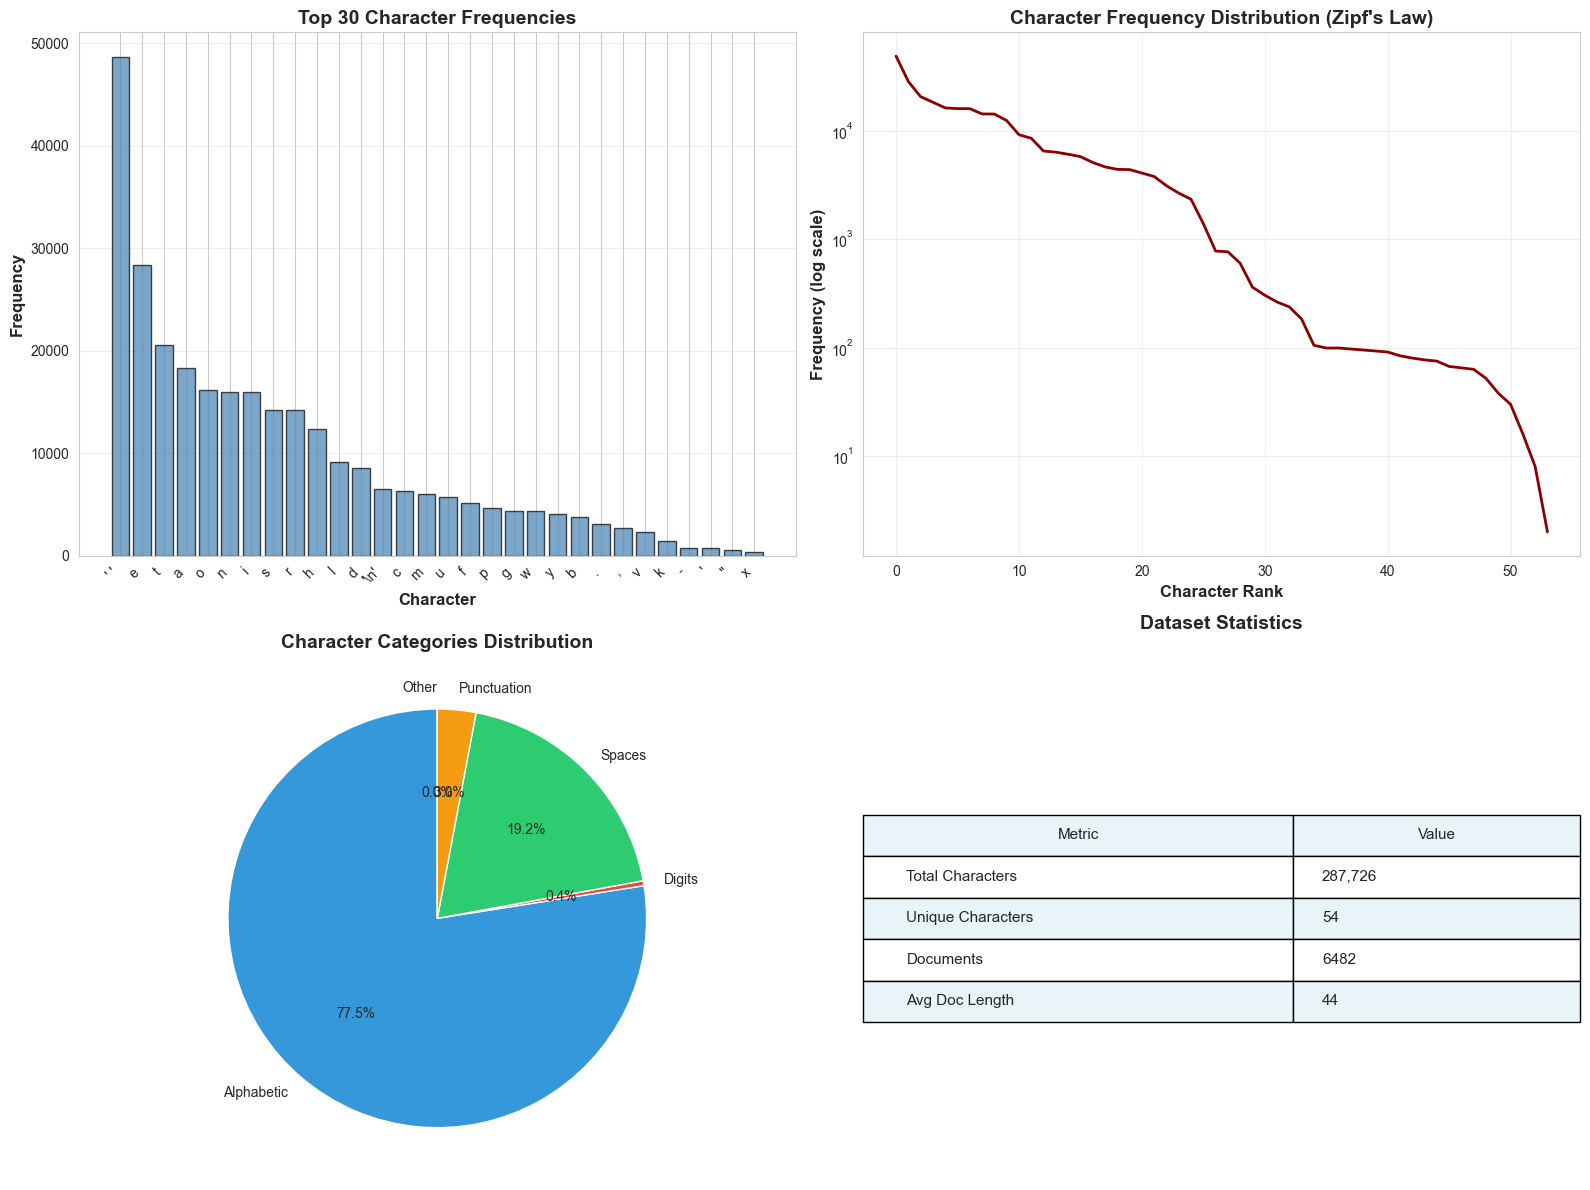

✅ Saved: images/text_length_analysis.png


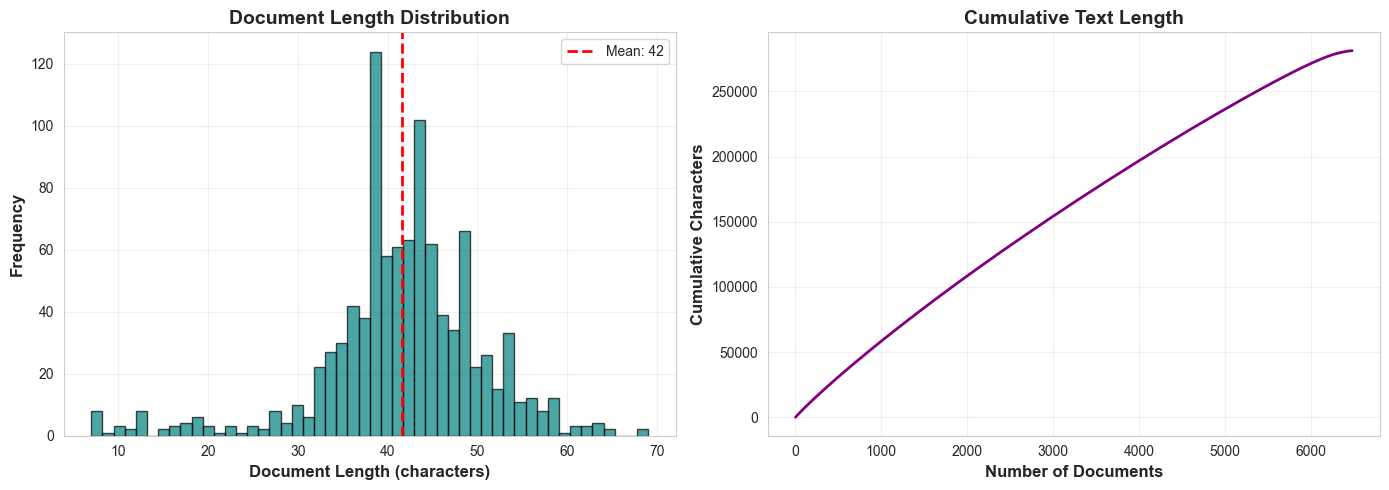

In [22]:
# PART 5: VISUALIZATIONS

print("\n" + "="*80)
print("📊 CREATING VISUALIZATIONS")
print("="*80)

# Figure 1: Character Frequency Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 30 characters bar plot
top_30 = char_freq.most_common(30)
chars_display = [repr(c[0]) if c[0] in ['\n', ' ', '\t', '\r'] else c[0] for c in top_30]
freqs = [c[1] for c in top_30]

axes[0, 0].bar(range(len(chars_display)), freqs, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Character', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Top 30 Character Frequencies', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(range(len(chars_display)))
axes[0, 0].set_xticklabels(chars_display, rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)

# Character frequency distribution (log scale)
all_freqs = sorted([f for c, f in char_freq.items()], reverse=True)
axes[0, 1].plot(range(len(all_freqs)), all_freqs, linewidth=2, color='darkred')
axes[0, 1].set_xlabel('Character Rank', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Frequency (log scale)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Character Frequency Distribution (Zipf\'s Law)', fontsize=14, fontweight='bold')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(alpha=0.3)

# Character categories
alpha = sum(1 for c in text if c.isalpha())
digit = sum(1 for c in text if c.isdigit())
space = sum(1 for c in text if c.isspace())
punct = sum(1 for c in text if c in string.punctuation)
other = n_total - alpha - digit - space - punct

categories = ['Alphabetic', 'Digits', 'Spaces', 'Punctuation', 'Other']
counts = [alpha, digit, space, punct, other]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

axes[1, 0].pie(counts, labels=categories, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1, 0].set_title('Character Categories Distribution', fontsize=14, fontweight='bold')

# Vocabulary statistics
stats_data = {
    'Metric': ['Total Characters', 'Unique Characters', 'Documents', 'Avg Doc Length'],
    'Value': [f"{n_total:,}", f"{n_chars}", f"{len(texts)}", f"{len(text)/len(texts):.0f}"]
}
axes[1, 1].axis('off')
table = axes[1, 1].table(cellText=list(zip(stats_data['Metric'], stats_data['Value'])),
                          colLabels=['Metric', 'Value'],
                          cellLoc='left',
                          loc='center',
                          colWidths=[0.6, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2)
for i in range(len(stats_data['Metric']) + 1):
    table[(i, 0)].set_facecolor('#e8f4f8' if i % 2 == 0 else 'white')
    table[(i, 1)].set_facecolor('#e8f4f8' if i % 2 == 0 else 'white')
axes[1, 1].set_title('Dataset Statistics', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../images/character_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: images/character_analysis.png")
plt.show()

# Figure 2: Text Length Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Document lengths
doc_lengths = [len(doc) for doc in texts[:min(1000, len(texts))]]

axes[0].hist(doc_lengths, bins=50, color='teal', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Document Length (characters)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Document Length Distribution', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].axvline(np.mean(doc_lengths), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {np.mean(doc_lengths):.0f}')
axes[0].legend()

# Cumulative character count
cumsum = np.cumsum(sorted([len(doc) for doc in texts], reverse=True))
axes[1].plot(range(len(cumsum)), cumsum, linewidth=2, color='purple')
axes[1].set_xlabel('Number of Documents', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Characters', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Text Length', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../images/text_length_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: images/text_length_analysis.png")
plt.show()

In [23]:
# PART 6: SEQUENCE PREPARATION

print("\n" + "="*80)
print("📦 PREPARING TRAINING SEQUENCES")
print("="*80)

# Parameters
seq_length = 100  # Length of input sequence
step = 3          # Step size for sliding window

print(f"⚙️  Sequence length: {seq_length}")
print(f"⚙️  Step size: {step}")

# Create sequences
print("\n🔄 Creating sequences...")
sequences = []
next_chars = []

for i in range(0, n_total - seq_length, step):
    if i % 100000 == 0:
        print(f"  Progress: {i:,}/{n_total:,} characters processed...")
    
    seq = text[i:i + seq_length]
    next_char = text[i + seq_length]
    sequences.append(seq)
    next_chars.append(next_char)

n_sequences = len(sequences)
print(f"\n✅ Sequence creation complete!")
print(f"📊 Total sequences: {n_sequences:,}")
print(f"💾 Memory estimate: {n_sequences * seq_length * 8 / 1024 / 1024:.2f} MB")

# Display sample sequences
print("\n📋 Sample sequences:")
print("-" * 80)
for i in range(min(3, len(sequences))):
    seq_display = sequences[i][:60].replace('\n', '\\n')
    print(f"\nSequence {i+1}:")
    print(f"  Input:  '{seq_display}...'")
    print(f"  Target: '{next_chars[i]}'")


📦 PREPARING TRAINING SEQUENCES
⚙️  Sequence length: 100
⚙️  Step size: 3

🔄 Creating sequences...
  Progress: 0/287,726 characters processed...

✅ Sequence creation complete!
📊 Total sequences: 95,876
💾 Memory estimate: 73.15 MB

📋 Sample sequences:
--------------------------------------------------------------------------------

Sequence 1:
  Input:  'put down a resolution on the subject\nand he is to be backed ...'
  Target: 'i'

Sequence 2:
  Input:  ' down a resolution on the subject\nand he is to be backed by ...'
  Target: ' '

Sequence 3:
  Input:  'wn a resolution on the subject\nand he is to be backed by mr....'
  Target: 'e'


In [24]:
# PART 7: VECTORIZATION

print("\n" + "="*80)
print("🔢 VECTORIZING SEQUENCES")
print("="*80)

print("🔄 Creating one-hot encoded arrays...")
print("⚠️  This may take a few minutes depending on dataset size...")

# Initialize arrays
X = np.zeros((n_sequences, seq_length, n_chars), dtype=np.bool_)
y = np.zeros((n_sequences, n_chars), dtype=np.bool_)

print(f"📊 X shape: {X.shape} = {X.nbytes / 1024 / 1024:.2f} MB")
print(f"📊 y shape: {y.shape} = {y.nbytes / 1024 / 1024:.2f} MB")

# Fill arrays
for i, seq in enumerate(sequences):
    if i % 10000 == 0:
        print(f"  Vectorizing: {i:,}/{n_sequences:,} ({i/n_sequences*100:.1f}%)")
    
    for t, char in enumerate(seq):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

print(f"\n✅ Vectorization complete!")


🔢 VECTORIZING SEQUENCES
🔄 Creating one-hot encoded arrays...
⚠️  This may take a few minutes depending on dataset size...
📊 X shape: (95876, 100, 54) = 493.75 MB
📊 y shape: (95876, 54) = 4.94 MB
  Vectorizing: 0/95,876 (0.0%)
  Vectorizing: 10,000/95,876 (10.4%)
  Vectorizing: 20,000/95,876 (20.9%)
  Vectorizing: 30,000/95,876 (31.3%)
  Vectorizing: 40,000/95,876 (41.7%)
  Vectorizing: 50,000/95,876 (52.2%)
  Vectorizing: 60,000/95,876 (62.6%)
  Vectorizing: 70,000/95,876 (73.0%)
  Vectorizing: 80,000/95,876 (83.4%)
  Vectorizing: 90,000/95,876 (93.9%)

✅ Vectorization complete!


In [26]:
# PART 8: SAVE PREPROCESSED DATA

print("\n" + "="*80)
print("💾 SAVING PREPROCESSED DATA")
print("="*80)

# Save arrays
print("🔄 Saving training data...")
np.save('../artifacts/X_sequences.npy', X)
np.save('../artifacts/y_targets.npy', y)
print("✅ Saved: X_sequences.npy, y_targets.npy")

# Save mappings
mappings = {
    'char_to_idx': char_to_idx,
    'idx_to_char': idx_to_char,
    'chars': chars,
    'n_chars': n_chars,
    'seq_length': seq_length
}

with open('../artifacts/char_mappings.pkl', 'wb') as f:
    pickle.dump(mappings, f)
print("✅ Saved: char_mappings.pkl")

# Save metadata
metadata = {
    'dataset_name': 'corto-ai/handwritten-text',
    'split_used': split_name,
    'total_samples': len(dataset),
    'text_field': text_field,
    'total_text_length': n_total,
    'vocabulary_size': n_chars,
    'num_sequences': n_sequences,
    'sequence_length': seq_length,
    'step_size': step,
    'num_documents': len(texts),
    'preprocessing_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
}

metadata_df = pd.DataFrame([metadata])
metadata_df.to_csv('../artifacts/preprocessing_metadata.csv', index=False)
print("✅ Saved: preprocessing_metadata.csv")


💾 SAVING PREPROCESSED DATA
🔄 Saving training data...
✅ Saved: X_sequences.npy, y_targets.npy
✅ Saved: char_mappings.pkl
✅ Saved: preprocessing_metadata.csv


In [27]:
# PART 9: SUMMARY REPORT

print("\n" + "="*80)
print("📋 PREPROCESSING SUMMARY")
print("="*80)

summary = f"""
{'='*80}
HANDWRITTEN TEXT GENERATION - PREPROCESSING COMPLETE
{'='*80}

📊 DATASET INFORMATION:
  • Dataset:                 corto-ai/handwritten-text
  • Split:                   {split_name}
  • Text Field:              {text_field}
  • Total Samples:           {len(dataset):,}

📊 TEXT STATISTICS:
  • Total Characters:        {n_total:,}
  • Unique Characters:       {n_chars}
  • Documents Extracted:     {len(texts):,}
  • Average Doc Length:      {len(text)/len(texts):.0f} chars

🔤 CHARACTER DISTRIBUTION:
  • Alphabetic:              {alpha:,} ({alpha/n_total*100:.1f}%)
  • Digits:                  {digit:,} ({digit/n_total*100:.1f}%)
  • Spaces:                  {space:,} ({space/n_total*100:.1f}%)
  • Punctuation:             {punct:,} ({punct/n_total*100:.1f}%)
  • Other:                   {other:,} ({other/n_total*100:.1f}%)

📦 SEQUENCE PREPARATION:
  • Sequence Length:         {seq_length}
  • Step Size:               {step}
  • Total Sequences:         {n_sequences:,}
  • Training Data Size:      {(X.nbytes + y.nbytes) / 1024 / 1024:.2f} MB

💾 SAVED FILES:
  ✅ artifacts/raw_text.txt
  ✅ artifacts/raw_documents.txt
  ✅ artifacts/X_sequences.npy
  ✅ artifacts/y_targets.npy
  ✅ artifacts/char_mappings.pkl
  ✅ artifacts/preprocessing_metadata.csv
  ✅ artifacts/character_analysis.png
  ✅ artifacts/text_length_analysis.png

📅 Processing Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}

✅ PREPROCESSING COMPLETE! Ready for model training.
"""

print(summary)

# Save summary
with open('../artifacts/preprocessing_summary.txt', 'w') as f:
    f.write(summary)
print("\n💾 Summary saved to: artifacts/preprocessing_summary.txt")

print("\n🎉 PREPROCESSING NOTEBOOK COMPLETE!")
print("📝 Next step: Run model_training.ipynb to train RNN, LSTM, and GRU models")


📋 PREPROCESSING SUMMARY

HANDWRITTEN TEXT GENERATION - PREPROCESSING COMPLETE

📊 DATASET INFORMATION:
  • Dataset:                 corto-ai/handwritten-text
  • Split:                   train
  • Text Field:              text
  • Total Samples:           6,482

📊 TEXT STATISTICS:
  • Total Characters:        287,726
  • Unique Characters:       54
  • Documents Extracted:     6,482
  • Average Doc Length:      44 chars

🔤 CHARACTER DISTRIBUTION:
  • Alphabetic:              222,978 (77.5%)
  • Digits:                  1,090 (0.4%)
  • Spaces:                  55,110 (19.2%)
  • Punctuation:             8,548 (3.0%)
  • Other:                   0 (0.0%)

📦 SEQUENCE PREPARATION:
  • Sequence Length:         100
  • Step Size:               3
  • Total Sequences:         95,876
  • Training Data Size:      498.68 MB

💾 SAVED FILES:
  ✅ artifacts/raw_text.txt
  ✅ artifacts/raw_documents.txt
  ✅ artifacts/X_sequences.npy
  ✅ artifacts/y_targets.npy
  ✅ artifacts/char_mappings.pkl
  ✅ artif